In [29]:
import numpy as np
import pandas as pd
from scipy.stats import t, poisson, chi2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [3]:
# Given data
observed_hurricanes = 15
average_hurricanes = 6.3

# Calculate the Poisson probability for 15 or more hurricanes
probability = 1 - poisson.cdf(observed_hurricanes - 1, average_hurricanes)

# Check if the probability is statistically significant
alpha = 0.022
is_significant = probability < alpha

# Print the results
print(f"Probability of observing 15 or more hurricanes: {probability:.4f}")
print(f"Is the result statistically significant at {alpha} level? {'Yes' if is_significant else 'No'}")


Probability of observing 15 or more hurricanes: 0.0022
Is the result statistically significant at 0.022 level? Yes


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
# Given data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Calculate differences between pre and post
differences = post - pre

# Calculate mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Calculate the t-statistic
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))

# Degrees of freedom
df = n - 1

# Critical value for a two-tailed test with alpha = 0.05
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)

# Check if the t-statistic is significant
is_significant = np.abs(t_statistic) > t_critical

# Print the results
print(f"Mean difference: {mean_diff:.2f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"Critical value: {t_critical:.4f}")
print(f"Is the result statistically significant at {alpha} level? {'Yes' if is_significant else 'No'}")

Mean difference: 18.70
T-statistic: 6.4347
Critical value: 2.2622
Is the result statistically significant at 0.05 level? Yes


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

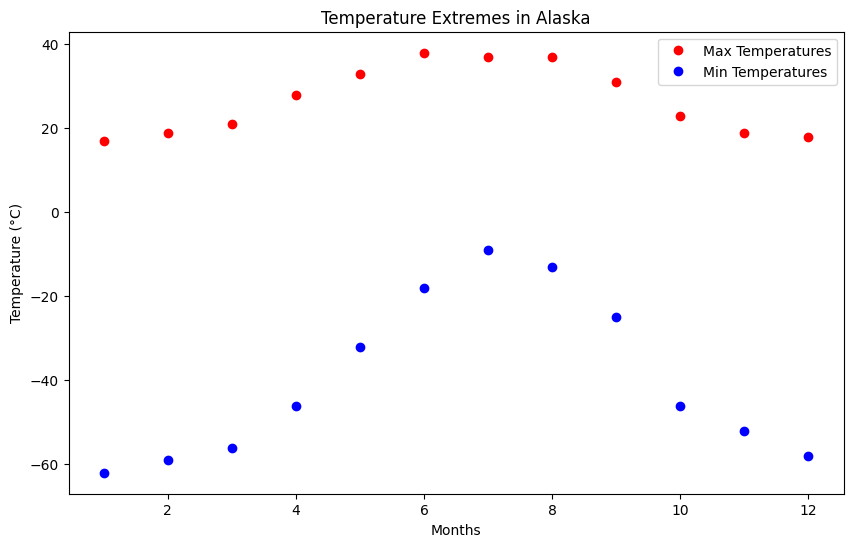

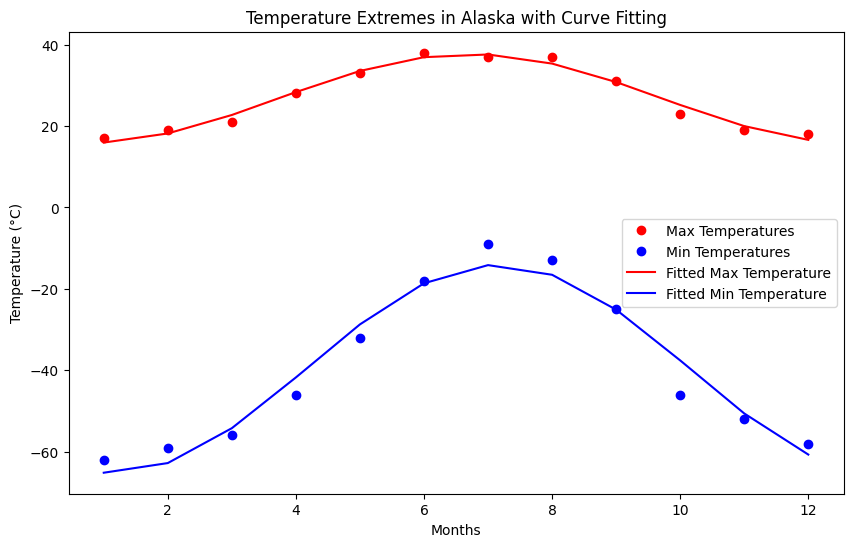

Is the time offset for min and max temperatures the same within the fit accuracy? No


In [5]:
# Given data
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot the temperatures
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()
plt.show()

# Define a suitable function for fitting
def temperature_function(month, amplitude, phase, offset):
    return amplitude * np.sin(2 * np.pi * (month + phase) / 12) + offset

# Fit the function to the data
p0 = [20, 0, -20]  # Initial guess for parameters
params_max, _ = curve_fit(temperature_function, months, max_temps, p0=p0)
params_min, _ = curve_fit(temperature_function, months, min_temps, p0=p0)

# Generate fitted curves
fit_max = temperature_function(months, *params_max)
fit_min = temperature_function(months, *params_min)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')
plt.plot(months, fit_max, 'r-', label='Fitted Max Temperature')
plt.plot(months, fit_min, 'b-', label='Fitted Min Temperature')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska with Curve Fitting')
plt.legend()
plt.show()

# Check if time offset is the same within fit accuracy
offset_difference = params_max[1] - params_min[1]
fit_accuracy = 0.1  # Adjust this value based on your criteria for "fit accuracy"
time_offsets_match = np.abs(offset_difference) < fit_accuracy

# Print the result
print(f"Is the time offset for min and max temperatures the same within the fit accuracy? {'Yes' if time_offsets_match else 'No'}")


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

C:\Users\ecapo\AppData\Local\Temp\ipykernel_27952\4016478722.py:24: RuntimeWarning: divide by zero encountered in divide
  chi_sq = np.sum(((hist - mu) / sigma_fit)**2 / sigma)


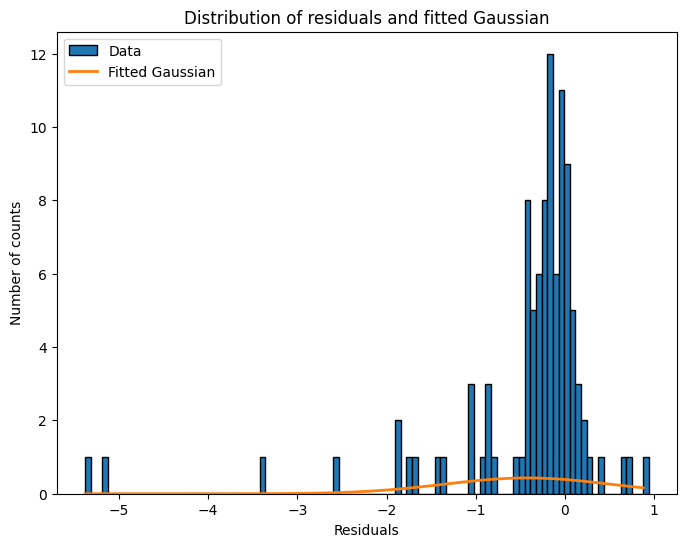

Chi-squared statistic: inf
Degrees of freedom: 98
P-value: 0.0


In [45]:
# Load the data
data_path = 'data/residuals_261.pkl'
residuals_data = pd.read_pickle(data_path)
residuals_df = pd.DataFrame(residuals_data.tolist())

n_bins = 100

# Extract the "residual" feature
residuals = residuals_df['residuals']
residuals = residuals[n_bins:n_bins * 2]

# Create a histogram of the residuals
hist, bins = np.histogram(residuals, bins=n_bins)

# Add a small constant to avoid division by zero
epsilon = 1e-10
hist[hist == 0] = epsilon
sigma = np.sqrt(hist)

# Fit a Gaussian distribution to the histogram
mu, sigma_fit = np.mean(residuals), np.sqrt(np.var(residuals))

# Calculate the chi-squared statistic
chi_sq = np.sum(((hist - mu) / sigma_fit)**2 / sigma)

# Calculate the degrees of freedom
df_r = n_bins - 2  # one less for the mean and one less for the standard deviation

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_sq, df_r)

# Plot the histogram and the fitted Gaussian
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=bins, label='Data', edgecolor='black', lw=1)
plt.plot(bins[:-1], 1 / (sigma_fit * np.sqrt(2 * np.pi)) *
         np.exp(-(bins[:-1] - mu)**2 / (2 * sigma_fit**2)),
         lw=2, label='Fitted Gaussian')
plt.xlabel('Residuals')
plt.ylabel('Number of counts')
plt.title('Distribution of residuals and fitted Gaussian')
plt.legend()
plt.show()

print(f'Chi-squared statistic: {chi_sq}')
print(f'Degrees of freedom: {df_r}')
print(f'P-value: {p_value}')


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [62]:
row = data[:0]
print(row)

Empty DataFrame
Columns: [1995.00274 0.944444]
Index: []


In [51]:
filepath = "data\munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(filepath)

# Function to fit
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

years = data[:, 0]
temperatures = data[:, 1]

# Select the range 2008 to 2012
mask = (years >= 2008) & (years <= 2012)
selected_years = years[mask]
selected_temperatures = temperatures[mask]

# Fit the function to the data
popt, pcov = curve_fit(f, selected_years, selected_temperatures)

# Plot the data and the best-fit model
plt.figure(figsize=(10, 6))
plt.scatter(years, temperatures, label='Data', color='blue')
plt.plot(selected_years, f(selected_years, *popt), label='Best-fit Model', color='red')
plt.title('Temperatures in Munich (2008 to 2012)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit values and uncertainties
print("Best-fit values:")
print("a:", popt[0])
print("b:", popt[1])
print("c:", popt[2])
print("\nUncertainties:")
print("a:", np.sqrt(pcov[0, 0]))
print("b:", np.sqrt(pcov[1, 1]))
print("c:", np.sqrt(pcov[2, 2]))

# Calculate the overall average temperature
average_temperature = np.mean(temperatures)
print("\nOverall average temperature in Munich:", average_temperature)

# Predict typical daily average values for the coldest and hottest time of year
coldest_temperature = f(0, *popt)
hottest_temperature = f(0.5, *popt)  # Assuming 0.5 represents the hottest time of the year
print("\nPredicted Coldest Temperature:", coldest_temperature)
print("Predicted Hottest Temperature:", hottest_temperature)

# Discuss the meaning of the b parameter
# The b parameter represents a phase shift in the cosine function. It determines the horizontal
# displacement of the graph along the time axis. In the context of temperature data, it could be
# associated with the timing of seasonal temperature variations, indicating when the temperatures
# are at their maximum or minimum.

InvalidIndexError: (slice(None, None, None), 0)